# Expectation Maximization (EM) algorithm for Gaussian Mixture Models (GMM)

The Expectation-Maximization algorithm is an approach for performing [Maximum Likelihood Estimation (MLE)](https://www.probabilitycourse.com/chapter8/8_2_3_max_likelihood_estimation.php) in the presence of [latent variables](https://en.wikipedia.org/wiki/Latent_and_observable_variables#:~:text=In%20statistics%2C%20latent%20variables%20(from,be%20directly%20observed%20or%20measured)) in Statistic models. 

 It happens to be a general and yet effective approach which is most commonly used for density estimation when missing data exist, such as [clustering algorithms](https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/), like the Gaussian Mixture Model in this case.

 To render the concept of a GMM more visually, let two given Normal distributions exist such as $N(\mu_1, \sigma_1^2)$ and $N(\mu_2,\sigma_2^2)$:


![image](assets/onXZr.png)


Let us recall the function which defines the Probability Density Function (PDF) for a Normal distribution:

<p align="center">
<img src="https://github.com/GBlanch/Statistical-Methods/blob/main/2.Expect.%E2%80%93Max.%20algorithm%20for%20GMMs/assets/pdf_gaussian.png"  width="100%" height="100%">

![image](assets/pdf_gaussian.png)

We then aim to find the density function (PDF) of the mixture model whose equation is:


**$$f(x|\theta)=b  f_1(x | \mu_1,\sigma_1^2)+(1−b) f_2(x | \mu_2,\sigma_2^2)$$**

where  $b$  is the probability of the data coming from the first normal probability distribution, whereas ($1- b$) from the second one.


Hence, our objective is to best fit this given probability density by estimating  b, $\mu_1,\sigma_1^2,\mu_2,\sigma_2^2$ - these be named $\theta$  -   via EM iterations.

Here is how we can represent the Workflow of the EM algorithm:


![image](assets/EM21.jpg)

**EM Steps**
- Step 1: Initialize aleatorily the parameters of $\theta$
- Step 2 (E): Compute the best Bayesian posterior probabilities given $\theta$
- Step 3 (M): Use the computed values of these posteriors to reestimate $\theta$ by computing these latter ones again
- Step 4 : Repeat steps 2 and 3 until convergence

As seen in the workflow chart above, the iteration stage of an EM algorithm ( Steps 2 and 3) alternates between performing two main sequences:

- Expectation: Given the current parameters of the GMM, estimate a probability distribution for these. Here is where we are to create a unified function for the expectation of the log-likelihood of each single Gaussian.
- Maximization: Given the current data, estimate these parameters to update the model. This is: compute these new parameters by maximizing the expectation of the log-likelihood we found in the E-step.


In order to better visualize the EM iteration procedure, let us suppose a random amount of observations of 1 dimension that belong to these two different Gaussian distributions.

We can also assign their randoms means and variances for these two Nomral distributions ( $a$ for yellow and $b$ for blue ). This is the initialization step. Please notice that in the depicted case below they have the same variance, but it´s not mandatory that they do:



![image](assets/initial.png)

Moving forward to the Expectation step, we compute the `Bayesiean posteriors` $a_i,b_i$ and so we can have a initial estimation on how much these observations may belong to both distributions. Let us assume also that the `Bayesian priors` $P(a)$ and $P(b)$ will be kept uniform throughout all the process by now.


Let us note that in _k-means_ clustering (hard clustering), we would find that these posteriors $a_i,b_i$ happen to be either 0 or 1, whereas in _EM clustering_ these happen to be pondered between 0 and 1. Likewise, in K-means we minimize ($x_i-\mu_b)^2$ whereas in EM we minimize ($x_i-\mu_b)^2$ / $\sigma_b ^2$ instead. This is to say: in the former case we are minimizing distance, whereas in the latter, besides minimizing the same distance, we are also `weighting` this distance by considering their respective `variances`.

Therefore, in every M step, we will estimate new means and variances for both Gaussians :



![image](assets/iter.png)

And after recomputing in an iteration loop both means and variances for both Gaussians, we attain the final form for both of the Gaussian distributions :

![image](assets/end.png)

Please notice that throughout all the EM algorithm none of the observations varied:

![image](assets/overall.png)

We start by generating the Gaussian Mixture Model composed of 2 Gaussians:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform


In [32]:
# given these means and standard deviations
μ1, σ1  = 3, 4
μ2, σ2  = 14, 2

#  create two random samples from a normal (Gaussian) distribution
y1 = np.random.normal(μ1, σ1,
                      1000)
y2 = np.random.normal(μ2, σ2,
                      500)
# append these into a single variable
data = np.append(y1,y2)

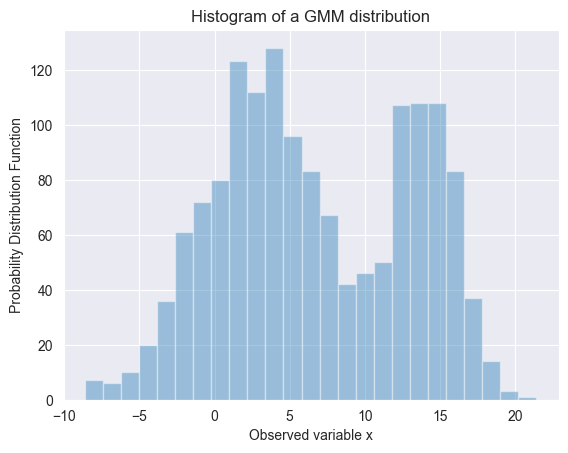

In [51]:

## plot 

x = np.linspace(min(data), max(data),
                1000)
sns.distplot(data, bins = 25, kde = False)\
                .set(title = 'Histogram of a GMM distribution',
                     xlabel = 'Observed variable x',
                     ylabel = 'Probability Distribution Function'
                     )



plt.show()


### Defining Gaussian 

To begin with, we are to elaborate the PDF for a single Gaussian distribution as we notd above. 

We will be using Python special methods for doing this, as well as for the rest of the calculus procedures and operations that were mentioned in the begining of this notebook:

In [3]:
class MUGaussian:
    "Model Univariate Gaussian"
        # mean and std deviation
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

        # probability density function
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'\
            .format(self.mu, self.sigma)

In [11]:
# given these means and standard deviations
μ1, σ1  = 3, 4
μ2, σ2  = 14, 2

#  create two random samples from a normal (Gaussian) distribution
y1 = np.random.normal(μ1, σ1,
                      1000)
y2 = np.random.normal(μ2, σ2,
                      500)
# append these into a unified variable
data = np.append(y1,y2)

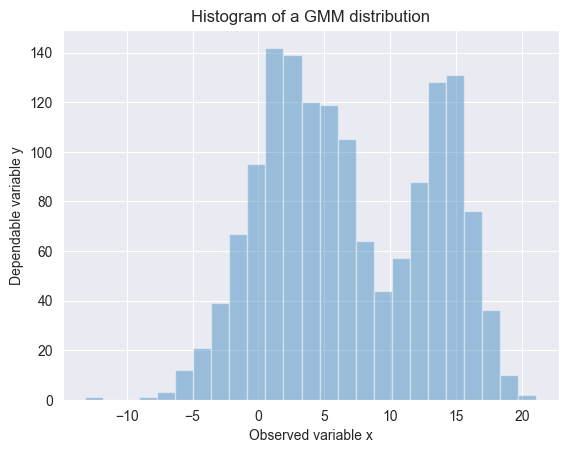

In [18]:

## plot 

x = np.linspace(min(data), max(data),
                1000)
sns.distplot(data, bins = 25, kde = False)\
                .set(title = 'Histogram of a GMM distribution',
                     xlabel = 'Observed variable x',
                     ylabel = 'Dependable variable y'
                     )

plt.show()


Utilizing the observations created at the begining of this notebook, we can find :

In [13]:
best_single = MUGaussian(np.mean(data),
                         np.std(data))
print('The best possible single Gaussian whose mean μ and std deviation σ are {:.3} and {:.3}, respectively.'\
      .format(best_single.mu,
              best_single.sigma)
              )

The best possible single Gaussian whose mean μ and std deviation σ are 6.9 and 6.18, respectively.


Let us plot this normal distribution:

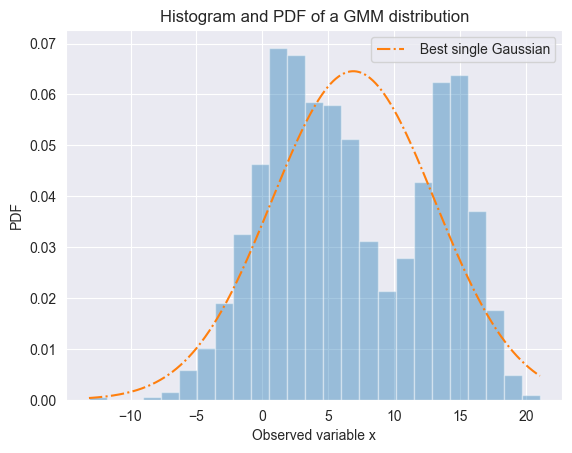

In [15]:
g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)

sns.distplot(data, bins=25,
             kde = False, norm_hist = True)\
                .set(title = 'Histogram and PDF of a GMM distribution',
                     xlabel = 'Observed variable x' ,
                     ylabel = 'PDF')
plt.plot(x, g_single,
         label=' Best single Gaussian',
         ls = '-.')

plt.legend();

And so we can ascertain that a single Gaussian distribution falls behind as an acceptable model for the given observations.

### Defining  GMM with Expectation-Maximization algorithm

In [20]:
class GaussianMixture:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min = min(data), mu_max = max(data),
                 sigma_min = .1, sigma_max = 1, mix = .5):
        self.data = data
        #initiate two Gaussians
        self.one = MUGaussian(uniform(mu_min,
                                      mu_max), 
                              uniform(sigma_min,
                                      sigma_max)
                                    )
        self.two = MUGaussian(uniform(mu_min,
                                      mu_max), 
                              uniform(sigma_min,
                                      sigma_max)
                                    )
        #as well as how much to mix these
        self.mix = mix

    # Step 2: Estimate
    def Estep(self):
        "Perform an Estimation (E)step, freshening up self.loglike in the process"
        # compute weights
        self.loglike = 0. # = this is the log of p = 1
        for datum in self.data:
            # unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1 - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalize
            wp1 /= den
            wp2 /= den
            # add into loglike
            self.loglike += log(wp1 + wp2)
            # yield normalized weight tuple
            yield (wp1, wp2)

    # Step 3: Maximize
    def Mstep(self, weights):
        "Perform an Maximization (M)step"
        # compute denominators
        (left, rigt) = zip(*weights)
        one_den = sum(left)
        two_den = sum(rigt)
        # compute new means
        self.one.mu = sum(w * d / one_den for (w, d) in zip(left, data))
        self.two.mu = sum(w * d / two_den for (w, d) in zip(rigt, data))
        # compute new std deviations
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
        # compute new mix
        self.mix = one_den / len(data)

    # Step 4: Repeat N + 1 times Steps 2 and 3
    def iterate(self, N = 1, verbose = False):
        "Perform N iterations, then compute log-likelihood"
        for i in range(1, N + 1):
            # This is the cornerstone of the EM algorithm ##
            self.Mstep(self.Estep()) 
            ##
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep()

    # Compute pdfs
    def pdf(self, x):
        return (self.mix) * self.one.pdf(x) + (1-self.mix) * self.two.pdf(x)
        
    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                              self.two, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, 
                                                        self.mix)

In [24]:
# Check out the fitting process
n_iterations = 10
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture(data)
for _ in range(n_iterations):
    try:
        # Training happens
        mix.iterate(verbose = True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix

    # Forestall division or indeterminate form errors      
    except (ZeroDivisionError,
            ValueError,
            RuntimeWarning):
        pass

 1 Mixture: Gaussian(-7.8982, 1.26497), Gaussian(6.71292, 6.23549), mix=0.00935)
 1 Mixture: Gaussian(-7.62078, 1.36758), Gaussian(6.62743, 6.3183), mix=0.00359)
 1 Mixture: Gaussian(-7.36213, 1.45635), Gaussian(6.59994, 6.34392), mix=0.00169)
 1 Mixture: Gaussian(-7.05612, 1.553), Gaussian(6.58829, 6.35454), mix=0.000876)
 1 Mixture: Gaussian(-6.67011, 1.64767), Gaussian(6.58282, 6.35944), mix=0.00049)
 1 Mixture: Gaussian(-6.19977, 1.71881), Gaussian(6.58013, 6.36181), mix=0.000297)
 1 Mixture: Gaussian(-5.67065, 1.74748), Gaussian(6.57875, 6.363), mix=0.000198)
 1 Mixture: Gaussian(-5.12817, 1.72795), Gaussian(6.57803, 6.36361), mix=0.000145)
 1 Mixture: Gaussian(-4.6199, 1.6711), Gaussian(6.57764, 6.36394), mix=0.000117)
 1 Mixture: Gaussian(-4.17745, 1.60022), Gaussian(6.57743, 6.36412), mix=0.000102)


In [25]:
# find best Mixture Gaussian model
n_iterations = 300
n_random_restarts = 4
best_mix = None
best_loglike = float('-inf')
print(('Computing best model with {} iterations and {} random restarts ...\n').format(n_iterations,
                                                                                      n_random_restarts))
for _ in range(n_random_restarts):
    mix = GaussianMixture(data)
    for _ in range(n_iterations):
        try:
            mix.iterate()
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        
        # Forestall division or indeterminate form errors  
        except (ZeroDivisionError,
                ValueError,
                RuntimeWarning):
            pass
print('Best Gaussian Mixture : μ = {:.3}, σ = {:.3} with μ = {:.3}, σ = {:.3}'.format(best_mix.one.mu,
                                                                                      best_mix.one.sigma,
                                                                                      best_mix.two.mu,
                                                                                      best_mix.two.sigma))


Computing best model with 300 iterations and 4 random restarts ...

Best Gaussian Mixture : μ = 2.74, σ = 4.0 with μ = 14.0, σ = 2.01


We are to plot the obtained results:

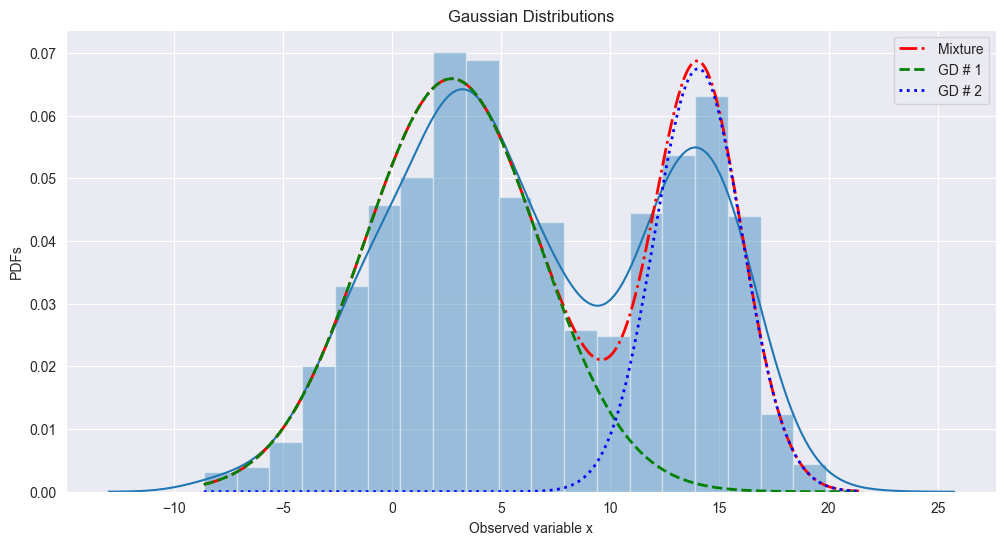

In [43]:
plt.figure(figsize = (12,6))
sns.distplot(data, bins = 20, 
             kde = True).set(title = 'Gaussian Distributions',
                     xlabel = 'Observed variable x' ,
                     ylabel = 'PDFs')


g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='Mixture', color = 'red',
         ls = '-.', lw = 2);

g_left = [best_mix.one.pdf(e) * best_mix.mix for e in x]
plt.plot(x, g_left, label='GD # 1', color = 'g',
         ls = '--', lw = 2);

g_right = [best_mix.two.pdf(e) * (1-best_mix.mix) for e in x]
plt.plot(x, g_right, label='GD # 2', color = 'b',
         ls = ':', lw = 2);

plt.legend();

Source of Literature and Images:

+ [Victor Lavrenko - Expectation Maximization: how it works](https://www.youtube.com/watch?v=iQoXFmbXRJA&list=PLBv09BD7ez_4e9LtmK626Evn1ion6ynrt&index=2)
+ [GFG - ML | Expectation-Maximization Algorithm](https://www.geeksforgeeks.org/ml-expectation-maximization-algorithm/)
+ [Machine Learning Mastery - A Gentle Introduction to Expectation-Maximization (EM Algorithm)](https://machinelearningmastery.com/expectation-maximization-em-algorithm/)